In [1]:
# House Price Prediciton

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

n = 100

area = np.random.randint(500, 2500, n)
bed = np.random.randint(1,5,n)
age = np.random.randint(0,30,n)

price = 3000*area + 50000*bed - 20000*age + np.random.normal(0,50000,n)

df = pd.DataFrame({"area":area,"bed":bed,"age":age,"price":price})


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[["area","bed","age"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(X_train,y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test,pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))
print("Coefficients:", model.coef_)
print("+1 sq ft -> ", model.coef_[0].round(2))
print("+1 bedroom -> ", model.coef_[1].round(2))
print("+1 year age -> ", model.coef_[2].round(2))



R2: 0.9989812422287395
RMSE: 43912.837466019606
Coefficients: [  3013.09062744  53551.29901972 -21076.46622267]
+1 sq ft ->  3013.09
+1 bedroom ->  53551.3
+1 year age ->  -21076.47


In [3]:
# Sales Forcasting

np.random.seed(2)

tv = np.random.randint(10,100,100)
social = np.random.randint(5,50,100)
discount = np.random.randint(0,30,100)

sales = 5*tv + 3*social + 10*discount + np.random.normal(0,50,100)

df2 = pd.DataFrame({"tv":tv,"social":social,"discount":discount,"sales":sales})


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

X = df2.drop("sales",axis=1)
y = df2["sales"]

pipe.fit(X,y)

print(pipe.named_steps["model"].coef_)
print("+1 TV ad -> ", pipe.named_steps["model"].coef_[0].round(2))
print("+1 Social ad -> ", pipe.named_steps["model"].coef_[1].round(2))
print("+1 Discount -> ", pipe.named_steps["model"].coef_[2].round(2))



[119.94357875  35.74597493  84.35253874]
+1 TV ad ->  119.94
+1 Social ad ->  35.75
+1 Discount ->  84.35


In [5]:
# Employee Salary Predictor(HR Analytics)

np.random.seed(3)

exp = np.random.randint(0,12,100)
skill = np.random.randint(40,100,100)
edu = np.random.choice([0,1,2],100)  # UG PG PhD

salary = 2*exp + 0.1*skill + 4*edu + np.random.normal(0,1,100)

df3 = pd.DataFrame({"exp":exp,"skill":skill,"edu":edu,"salary":salary})


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(2)),
    ("ridge", Ridge(alpha=1))
])

X = df3.drop("salary",axis=1)
y = df3["salary"]

pipe.fit(X,y)

pred = pipe.predict(X)

print("R2:", r2_score(y,pred))


R2: 0.9875852692509277


In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter


In [8]:
# Defining Funcion for Regression Metrics

def Reg_Models_Evaluation_Metrics (model,X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator= model, X= X_train, y= y_train, cv=10)
    
    # Calculate R2 value
    r2 = model.score(X_test, y_test)
    # Number of Observation is the shape along axis 0
    n = X_test.shape[0]
    # Number of features
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1 -(1-r2)*((n-1)/n-p-1)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()
    
    # Print them
    print("RMSE: ", round(RMSE,4))
    print("R2: ", round(R2,4))
    print("Adjusted R2: ", round(adjusted_r2,4))
    print("Cross Validated R2: ", round(cv_score.mean(),4))
    
    return R2, adjusted_r2, CV_R2, RMSE



In [9]:
# Import DATA

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

try:
    raw_df1 = pd.read_csv('../input/avocado-prices/avocado.csv')
    raw_df2 = pd.read_csv('../input/boston-house-prices/housing.csv', header = None, delimiter = r"\s+", names = column_names)
except:
    raw_df1 = pd.read_csv('avocado.csv')
    raw_df2 = pd.read_csv('housing.csv', header = None, delimiter = r"\s+", names = column_names)

print(raw_df1.head())
print(raw_df2.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [10]:
# Data formatting

# Deleting column
raw_df1 = raw_df1.drop('Unnamed: 0', axis = 1)

numeric_columns = ['AveragePrice', 'Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['Region', 'Type']
time_columns = ['Data', 'Year']
numeric_columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [11]:
# Visualisations Function

def dist_custom(dataset, columns_list, rows, cols, suptitle):
    
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))


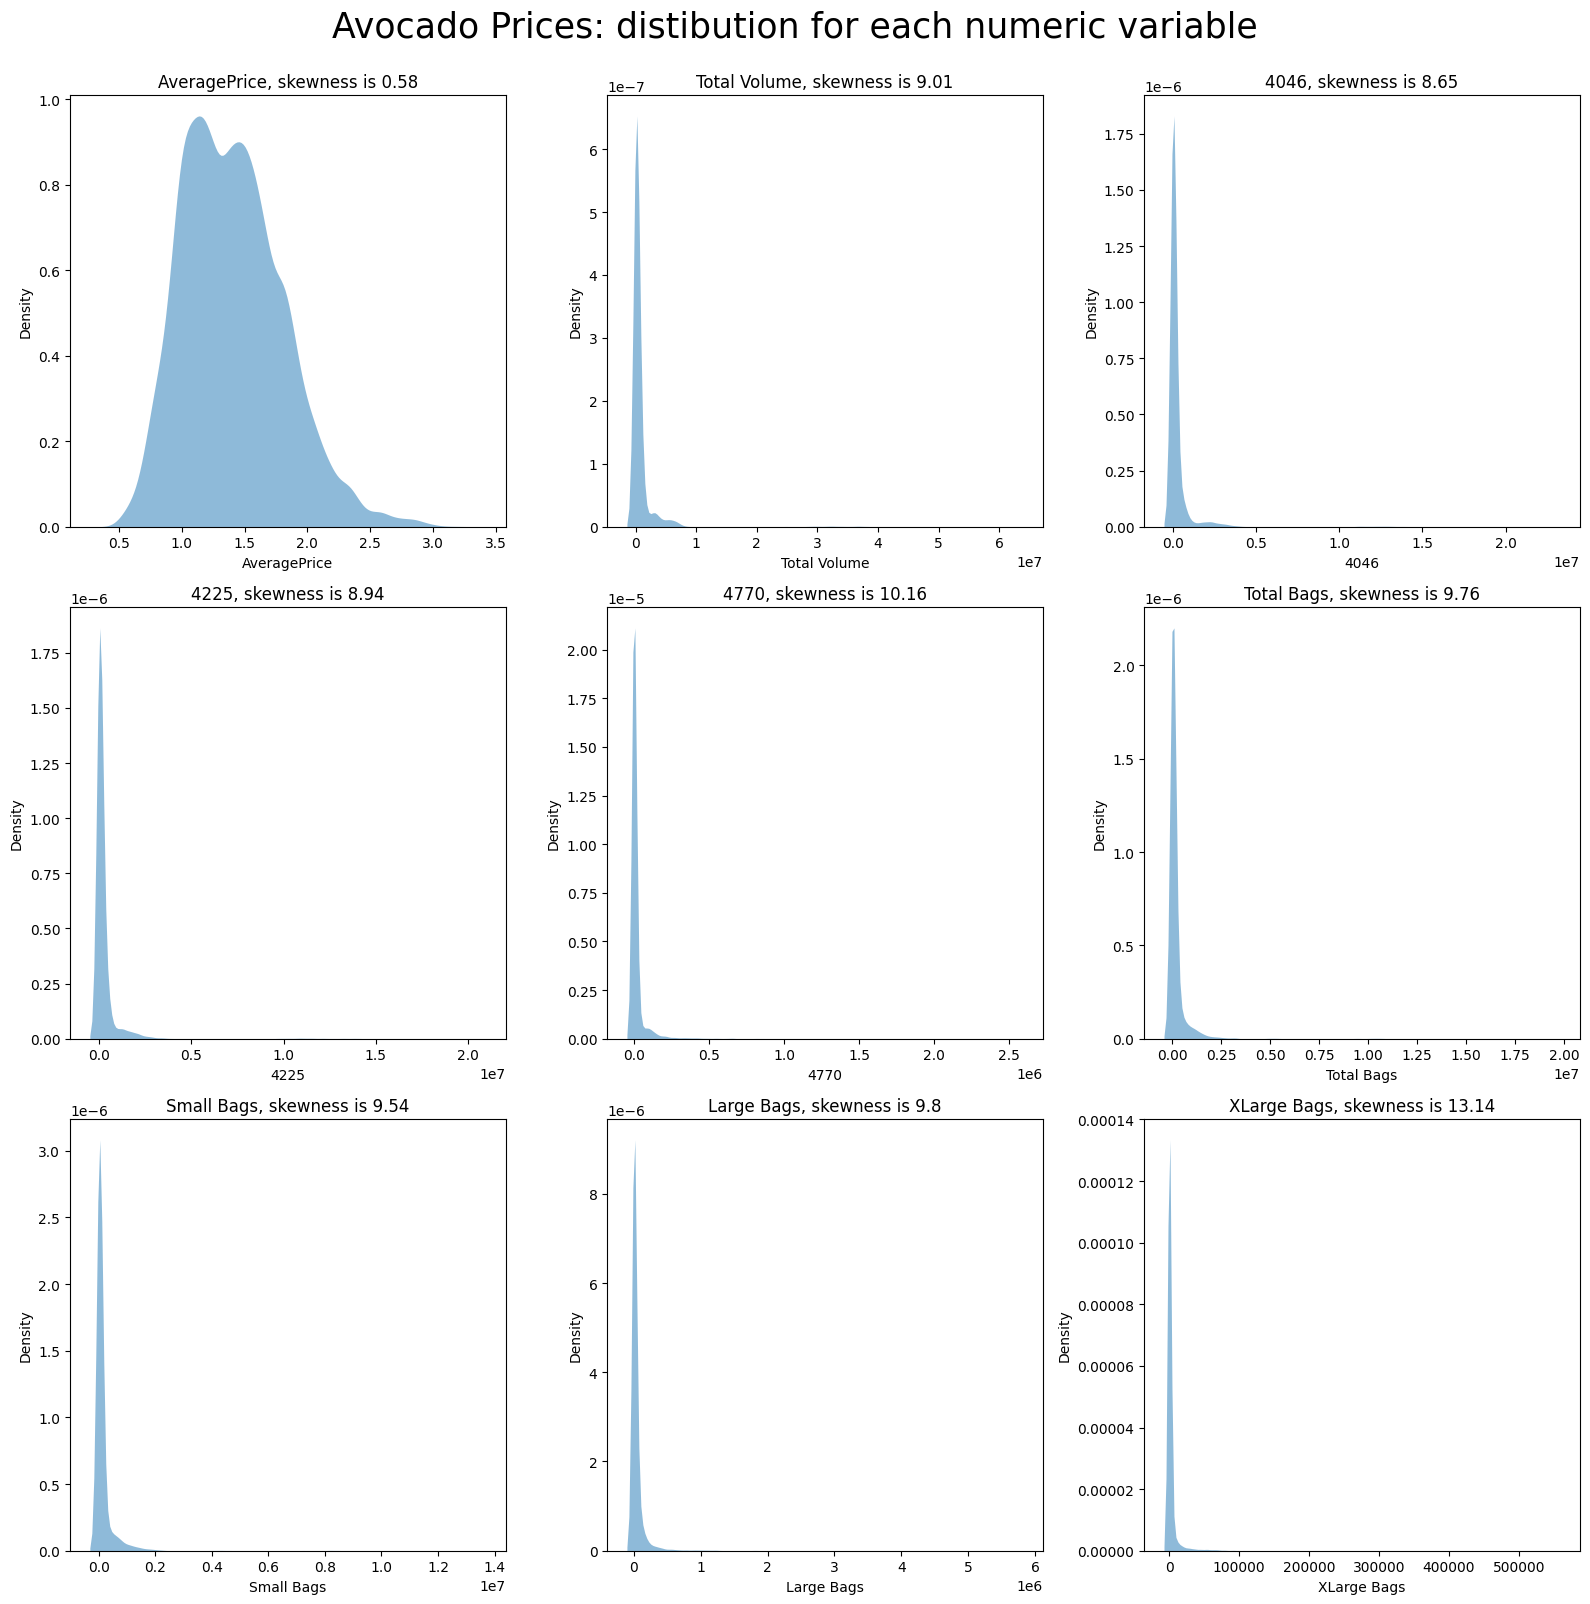

In [12]:
# Avacodo price graph skweness : It tells you if the data is symmetrical or "leaning" to one side.

dist_custom(dataset=raw_df1, columns_list=numeric_columns, rows=3, cols=3, suptitle='Avocado Prices: distibution for each numeric variable')
plt.tight_layout()

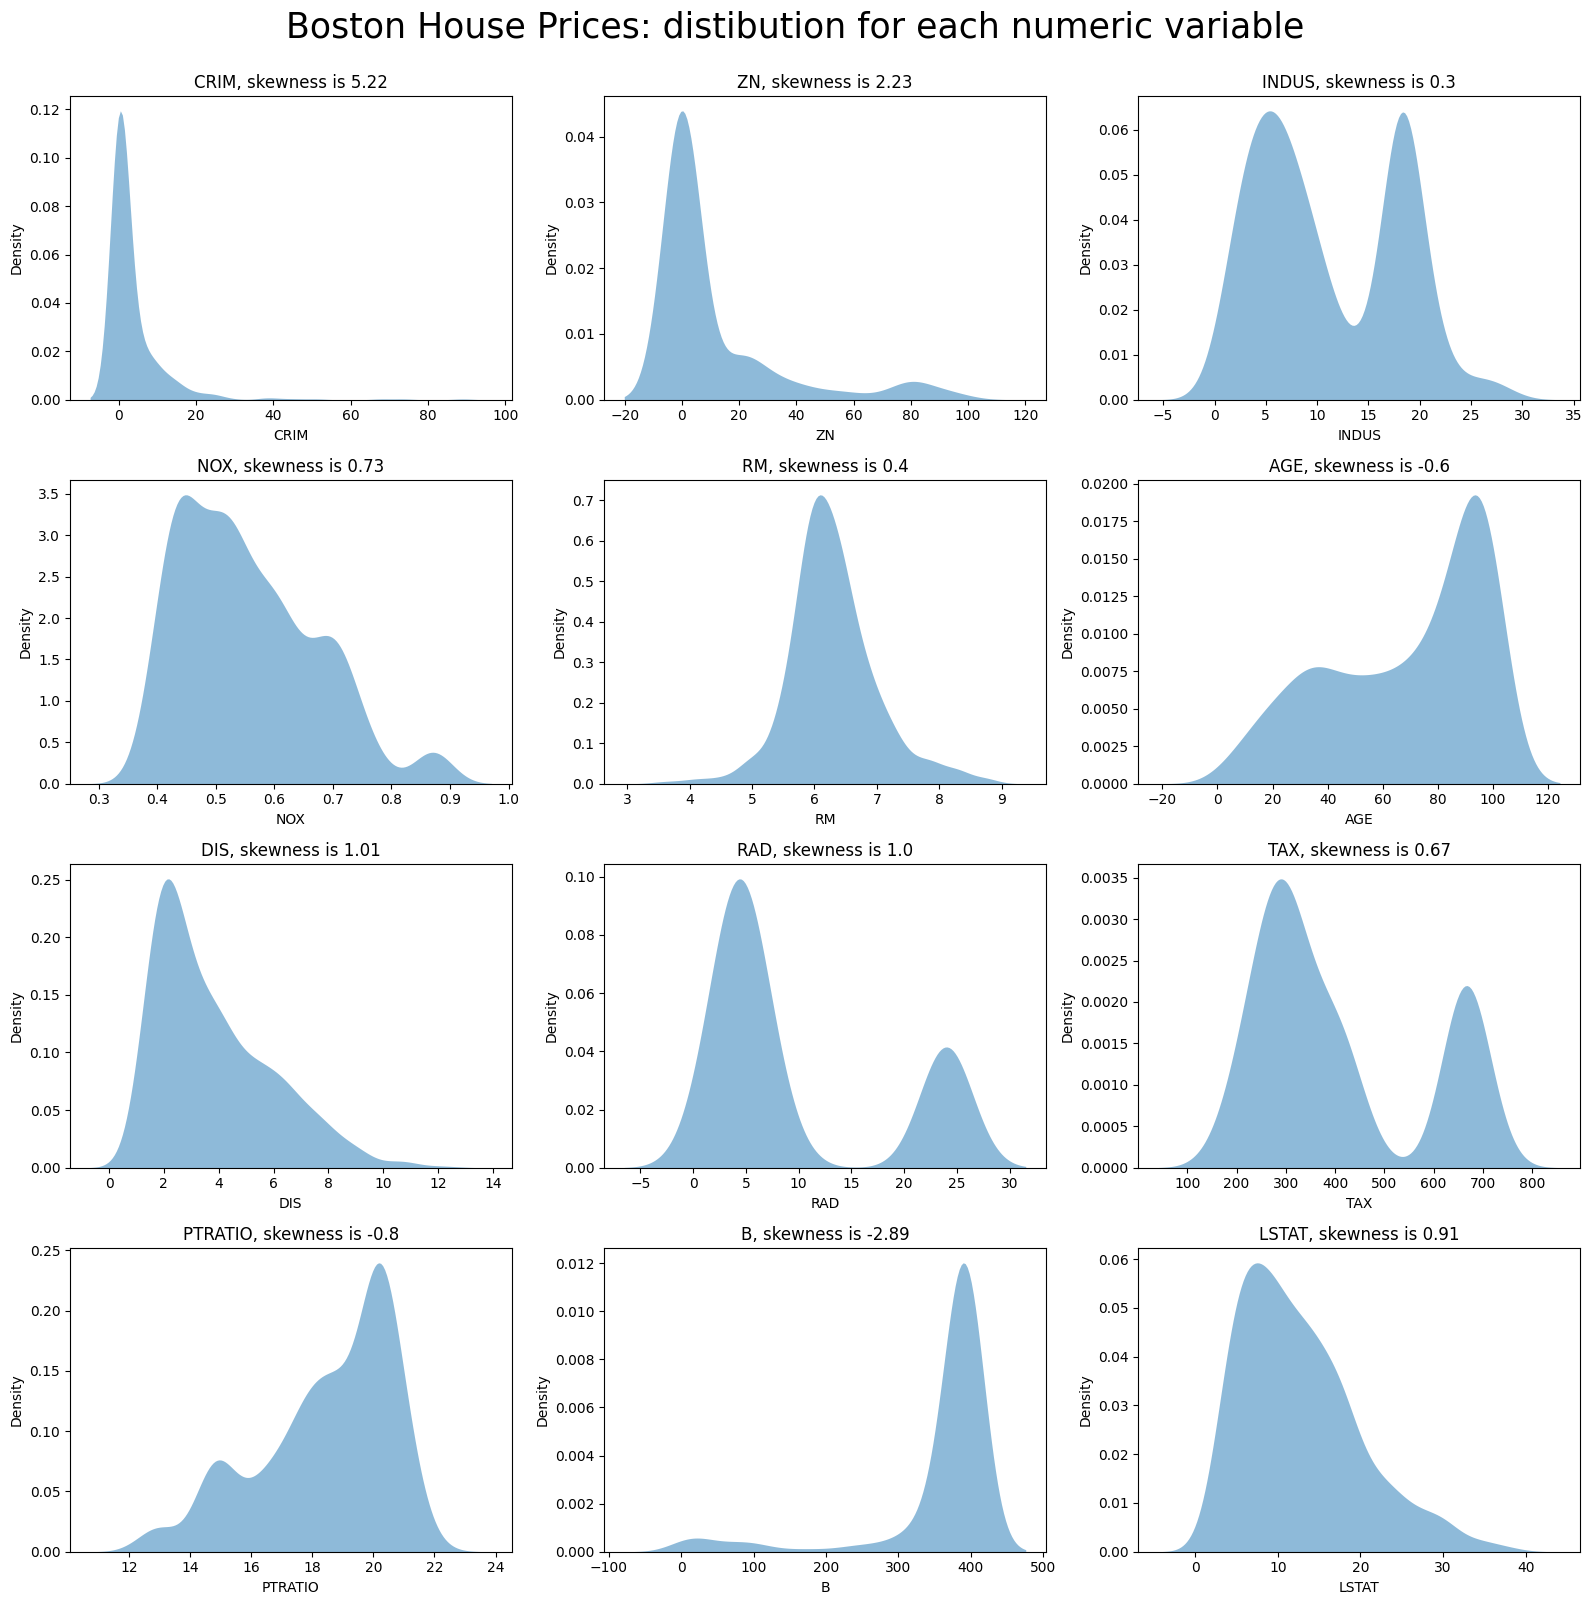

In [13]:
# Boston House price graph skweness: It tells you if the data is symmetrical or "leaning" to one side.

dist_custom(dataset=raw_df2, columns_list=numeric_columns_boston, rows=4, cols=3, suptitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

In [14]:
# DATA PRE-PROCESSING

# Changing data types FOR more flexibility(Smart data typing)
for i in raw_df1.columns:
    if i == 'Date':
        raw_df1[i] = raw_df1[i].astype('datetime64[ns]')
    elif raw_df1[i].dtype == 'object':
        raw_df1[i] = raw_df1[i].astype('category')

In [15]:
# Time based Feature Engineering

df1 = raw_df1.copy()

df1['Date'] = pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].dt.month

df1['Spring'] = df1['month'].between(3,5,inclusive='both')
df1['Summer'] = df1['month'].between(6,8,inclusive='both')
df1['Fall'] = df1['month'].between(9,11,inclusive='both')
df1['Winter'] = df1['month'].between(12,2,inclusive='both')

df1.Spring = df1.Spring.replace({True: 1, False: 0})
df1.Summer = df1.Summer.replace({True: 1, False: 0})
df1.Fall = df1.Fall.replace({True: 1, False: 0})
df1.Winter = df1.Winter.replace({True: 1, False: 0})


In [16]:
# Encoding labels for 'type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

print(df1.head())

#ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
df1 = pd.get_dummies(data=df1, columns=['region'], drop_first=True)

# Final cleanup: Dropping unnecessary columns
cols_to_drop = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
df1 = df1.drop(columns=[c for c in cols_to_drop if c in df1.columns])

print(df1.head())

        Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     0  2015  Albany     12   
1     9505.56     9408.07       97.49          0.0     0  2015  Albany     12   
2     8145.35     8042.21      103.14          0.0     0  2015  Albany     12   
3     5811.16     5677.40      133.76          0.0     0  2015  Albany     12   
4     6183.95     5986.26      197.69          0.0     0  2015  Albany     11   

  Spring Summer Fall Winter  
0      0      0    0      0  
1      0      0    0

In [17]:
# Outlier Detection using Tukey IQR technique.

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # Outlier detected
        print(f"Outliers detected in '{column}': {len(outlier_list_column)}")
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    print("-" * 30)
    print(f"Total unique rows with atleast one outlier: {len(outlier_list)}")
    print(f"Rows with MORE THAN {n} outliers (to be deleted): {len(multiple_outliers)}")
    print("-" * 30)
    
    # This is the actual number you are returning to be deleted
    print('Actual records to be removed:', len(multiple_outliers))
     
    return multiple_outliers

In [18]:
# cleaning outlier for Avacado data

numeric_columns2 = ['Total Volume', 'Total Bags']

Outliers_IQR = IQR_method(df1,1,numeric_columns2)
# dropping outliers
df1 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Outliers detected in 'Total Volume': 2297
Outliers detected in 'Total Bags': 2533
------------------------------
Total unique rows with atleast one outlier: 2749
Rows with MORE THAN 1 outliers (to be deleted): 2081
------------------------------
Actual records to be removed: 2081


In [19]:
# Cleaning outlier for boston house data

numeric_columns2 = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

Outliers_IQR = IQR_method(raw_df2,1,numeric_columns2)
# dropping outliers
df2 = raw_df2.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Outliers detected in 'CRIM': 66
Outliers detected in 'ZN': 68
Outliers detected in 'NOX': 0
Outliers detected in 'RM': 30
Outliers detected in 'AGE': 0
Outliers detected in 'DIS': 5
Outliers detected in 'PTRATIO': 15
Outliers detected in 'B': 77
Outliers detected in 'LSTAT': 7
------------------------------
Total unique rows with atleast one outlier: 208
Rows with MORE THAN 1 outliers (to be deleted): 52
------------------------------
Actual records to be removed: 52


In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df1.drop('AveragePrice', axis= 1)
y = df1['AveragePrice']

X2 = df2.iloc[:, :-1]
y2 = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names].values
    scaler_feature = StandardScaler().fit_transform(features)
    df[col_names]= scaler_feature
    
    return df

In [22]:
col_names = ['Total Volume', 'Total Bags']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train2 = Standard_Scaler (X_train2, col_names)
X_test2 = Standard_Scaler (X_test2, col_names)

In [23]:
# COMPARING DIFFERENT MODELS

# 1.Linear Regression
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)


In [24]:
# Linear Regression performance for Avocado dataset
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

RMSE:  0.2559
R2:  0.5988
Adjusted R2:  25.8749
Cross Validated R2:  0.6043


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.598793,25.87489,0.604282,0.255931


Text(0.5, 1.0, 'Linear regression for Avocado dataset')

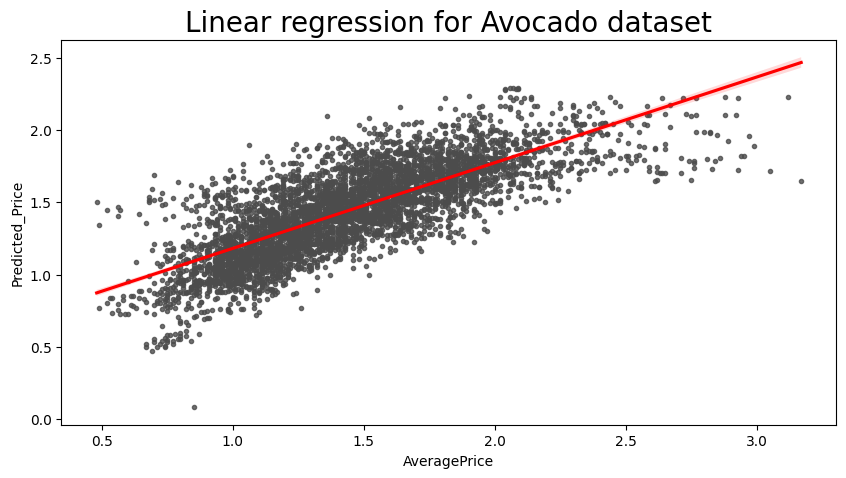

In [25]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Linear regression for Avocado dataset', fontsize = 20)


In [28]:
# Linear Regression performance for Boston dataset
lm.fit(X_train2, y_train2)
y_pred2 = lm.predict(X_test2)

ndf = [Reg_Models_Evaluation_Metrics(lm,X_train2,y_train2,X_test2,y_test2,y_pred2)]

lm_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score2.insert(0, 'Model', 'Linear Regression')
lm_score2


RMSE:  4.824
R2:  0.6547
Adjusted R2:  5.4912
Cross Validated R2:  0.6739


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.65472,5.491162,0.67391,4.823995


Text(0.5, 1.0, 'Linear regression for Boston dataset')

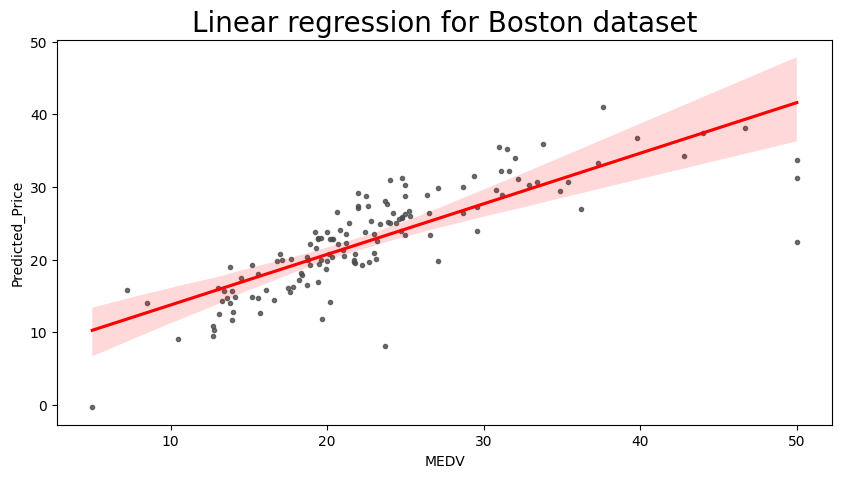

In [29]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test2,y=y_pred2,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Linear regression for Boston dataset', fontsize = 20)

In [30]:
# 2. Random Forest: A Random Forest is an ensemble machine learning model that combines the results of many individual decision trees to make more accurate and stable predictions.

from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [31]:
# Random Forest performance for Avocado dataset
RandomForest_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score


RMSE:  0.1856
R2:  0.789
Adjusted R2:  14.0828
Cross Validated R2:  0.8763


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.788988,14.08277,0.876344,0.185606


In [32]:
# Random Forest performance for Boston dataset
RandomForest_reg.fit(X_train2, y_train2)

# Model making a prediction on test data
y_pred2 = RandomForest_reg.predict(X_test2)

ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train2,y_train2,X_test2,y_test2,y_pred2)]

rf_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score2.insert(0, 'Model', 'Random Forest')
rf_score2

RMSE:  3.6625
R2:  0.801
Adjusted R2:  3.5888
Cross Validated R2:  0.7844


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.800977,3.588752,0.784399,3.662459


Text(0.5, 1.0, 'Random Forest for Avocado dataset')

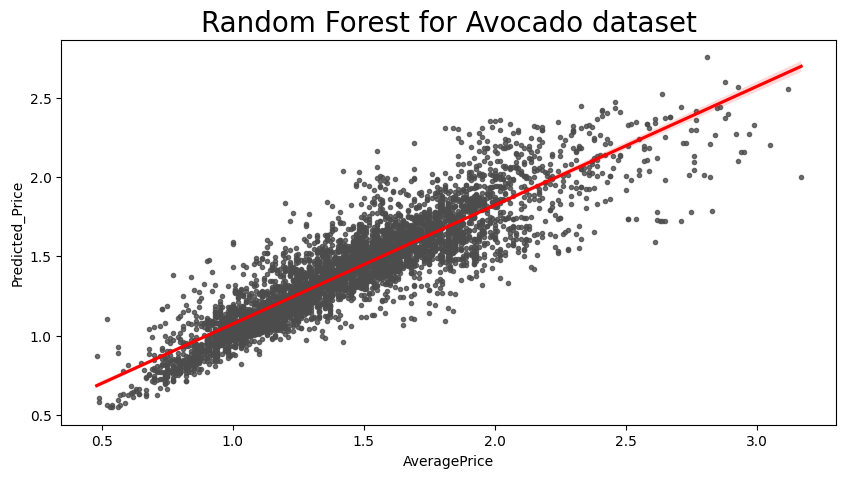

In [33]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Random Forest for Avocado dataset', fontsize = 20)

Text(0.5, 1.0, 'Random Forest for Boston dataset')

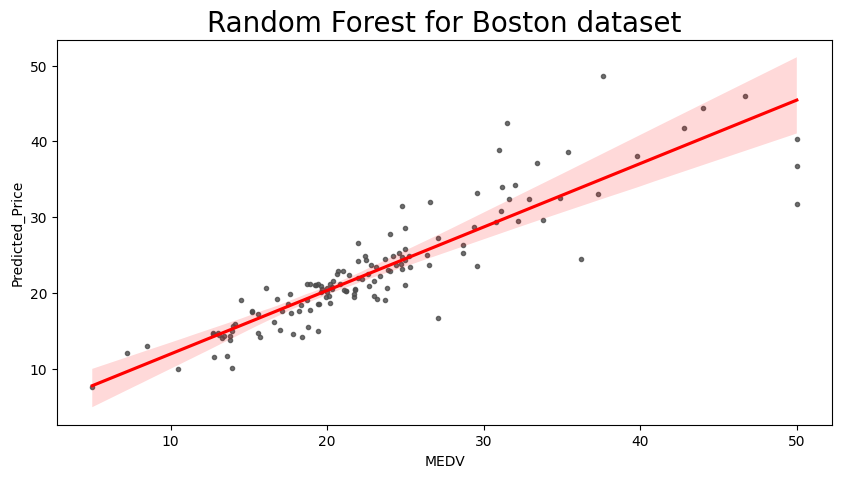

In [34]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test2,y=y_pred2,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Random Forest for Boston dataset', fontsize = 20)

In [35]:
# 3. Ridge Regression (L2 Regularization): Ridge Regression is an advanced version of linear regression that uses a technique called L2 Regularization to prevent the model from overfitting. 

from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

In [36]:
# Ridge Regression performance for Avocado dataset
ridge_reg.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score



RMSE:  0.2558
R2:  0.5991
Adjusted R2:  25.8579
Cross Validated R2:  0.6041


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.599068,25.857853,0.60412,0.255843


In [37]:
# Ridge Regression performance for Boston dataset
ridge_reg.fit(X_train2, y_train2)

# Model making a prediction on test data
y_pred2 = ridge_reg.predict(X_test2)

ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train2,y_train2,X_test2,y_test2,y_pred2)]

rr_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score2.insert(0, 'Model', 'Ridge Regression')
rr_score2


RMSE:  4.8178
R2:  0.6556
Adjusted R2:  5.4797
Cross Validated R2:  0.6773


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.6556,5.479716,0.677292,4.817844


Text(0.5, 1.0, 'Ridge Regression for Avocado dataset')

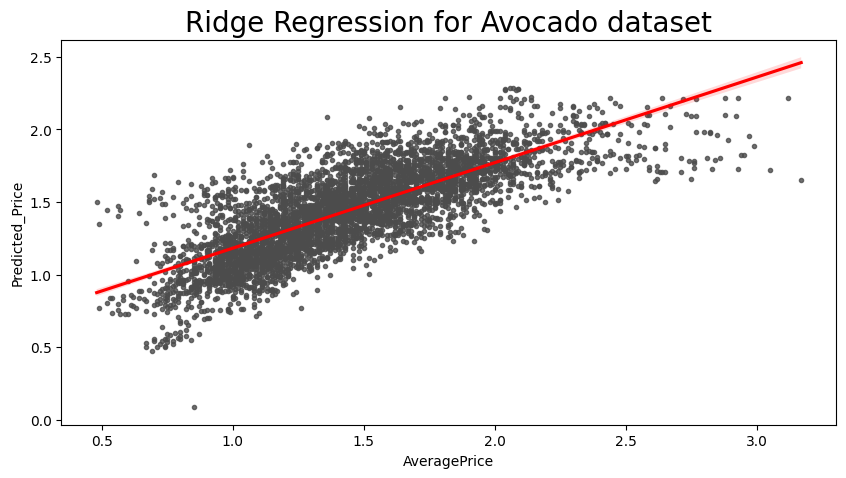

In [38]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Ridge Regression for Avocado dataset', fontsize = 20)

Text(0.5, 1.0, 'Ridge Regression for Boston dataset')

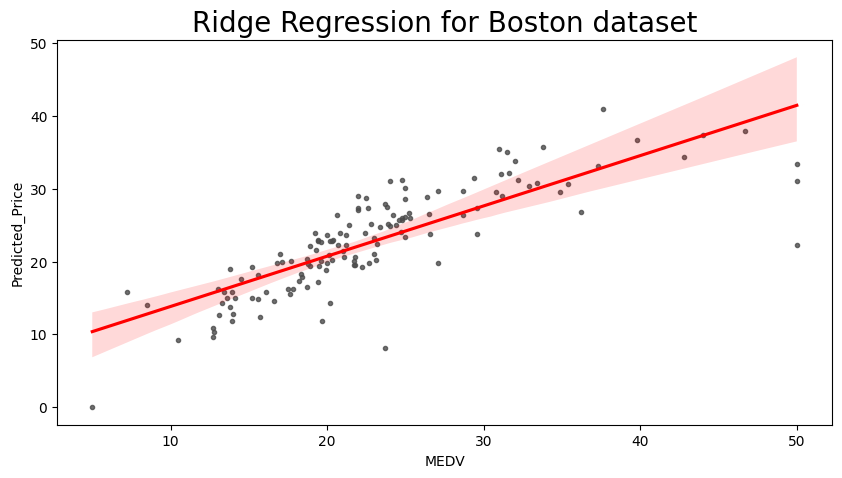

In [39]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test2,y=y_pred2,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('Ridge Regression for Boston dataset', fontsize = 20)

In [40]:
# 4. XGBoost: XGBoost (short for eXtreme Gradient Boosting) is a powerful, high-speed machine learning library specifically designed for structured or tabular data. Unlike a Random Forest (where trees are built independently in parallel), XGBoost builds trees sequentially 

from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [41]:
# XGBoost performance for Avocado dataset
XGBR.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

RMSE:  0.1848
R2:  0.7908
Adjusted R2:  13.9733
Cross Validated R2:  0.912


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.790755,13.973262,0.911971,0.184827


In [42]:
# XGBoost performance for Boston dataset

XGBR.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred2 = XGBR.predict(X_test2)

ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train2,y_train2,X_test2,y_test2,y_pred2)]

XGBR_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score2.insert(0, 'Model', 'XGBoost')
XGBR_score2

RMSE:  3.5951
R2:  0.8082
Adjusted R2:  3.4944
Cross Validated R2:  0.8256


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.808228,3.49443,0.825649,3.595118


Text(0.5, 1.0, 'XGBoost for Avocado dataset')

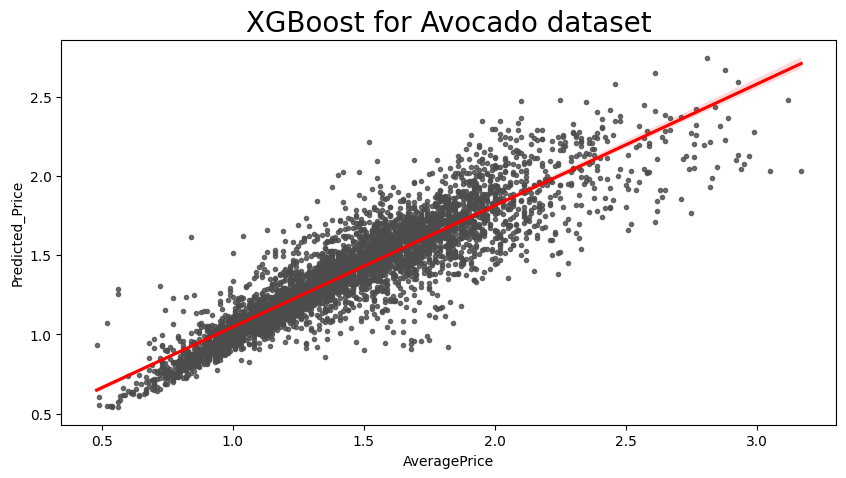

In [43]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('XGBoost for Avocado dataset', fontsize = 20)

Text(0.5, 1.0, 'XGBoost for Boston dataset')

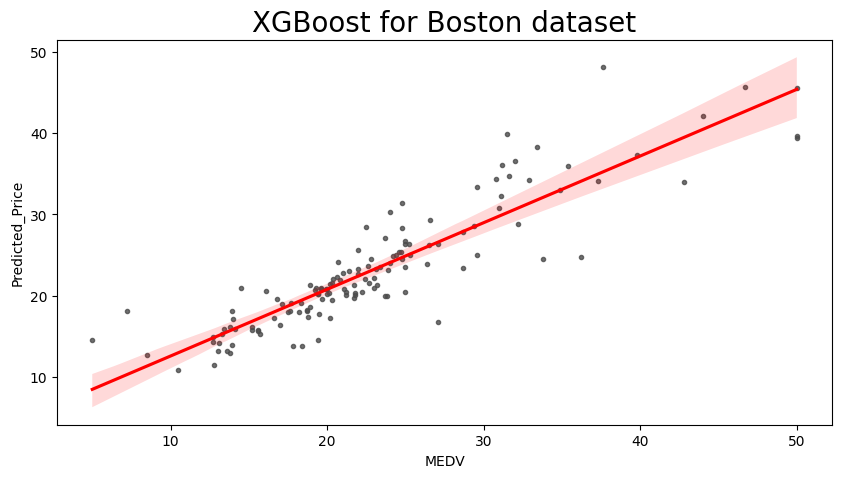

In [44]:
# Plot its model
plt.figure(figsize = (10,5))
sns.regplot(x=y_test2,y=y_pred2,ci=99, marker='.', color='.3', line_kws=dict(color='r'),)
plt.ylabel('Predicted_Price')
plt.title('XGBoost for Boston dataset', fontsize = 20)

In [45]:
# 5. Recursive Feature Elimination (RFE): Recursive Feature Elimination (RFE) is a feature selection technique that simplifies your model by "pruning" away the least useful information. 

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [46]:
# Random Forest RFE performance for Avocado dataset

rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

RMSE:  0.1814
R2:  0.7985
Adjusted R2:  13.4926
Cross Validated R2:  0.8884


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.798507,13.492638,0.888439,0.181371


In [47]:
# Random Forest RFE performance for Boston dataset

rf_pipeline.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred2 = rf_pipeline.predict(X_test2)

ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train2,y_train2,X_test2,y_test2,y_pred2)]

rfe_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score2.insert(0, 'Model', 'Random Forest with RFE')
rfe_score2


f:\Python code\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=60 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(
f:\Python code\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=60 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(
f:\Python code\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=60 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(
f:\Python code\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=60 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(
f:\Python code\.venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_selec

RMSE:  3.4209
R2:  0.8264
Adjusted R2:  3.2585
Cross Validated R2:  0.813


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.826365,3.258528,0.813027,3.420899


In [48]:
# 7. Final Model Evaluation

# 7.1 Avocado dataset
predictions = pd.concat([rfe_score, XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.798507,13.492638,0.888439,0.181371
1,XGBoost,0.790755,13.973262,0.911971,0.184827
2,Ridge Regression,0.599068,25.857853,0.604120,0.255843
3,Random Forest,0.788988,14.082770,0.876344,0.185606
4,Linear Regression,0.598793,25.874890,0.604282,0.255931


In [49]:
# 7.2 Boston dataset

predictions2 = pd.concat([rfe_score2, XGBR_score2, rr_score2, rf_score2, lm_score2], ignore_index=True, sort=False)
predictions2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.826365,3.258528,0.813027,3.420899
1,XGBoost,0.808228,3.494430,0.825649,3.595118
2,Ridge Regression,0.655600,5.479716,0.677292,4.817844
3,Random Forest,0.800977,3.588752,0.784399,3.662459
4,Linear Regression,0.654720,5.491162,0.673910,4.823995


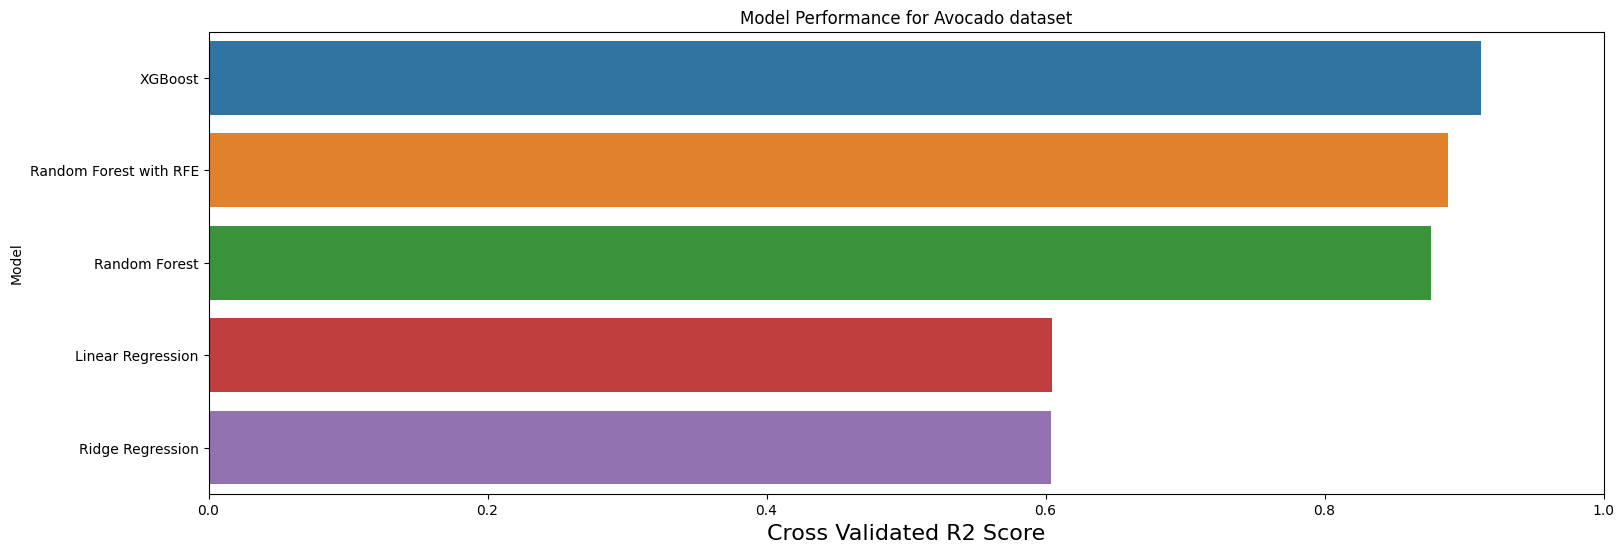

In [50]:
# 7.3 Visualizing Model Performance

f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, hue='Model', ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Avocado dataset')

plt.show()

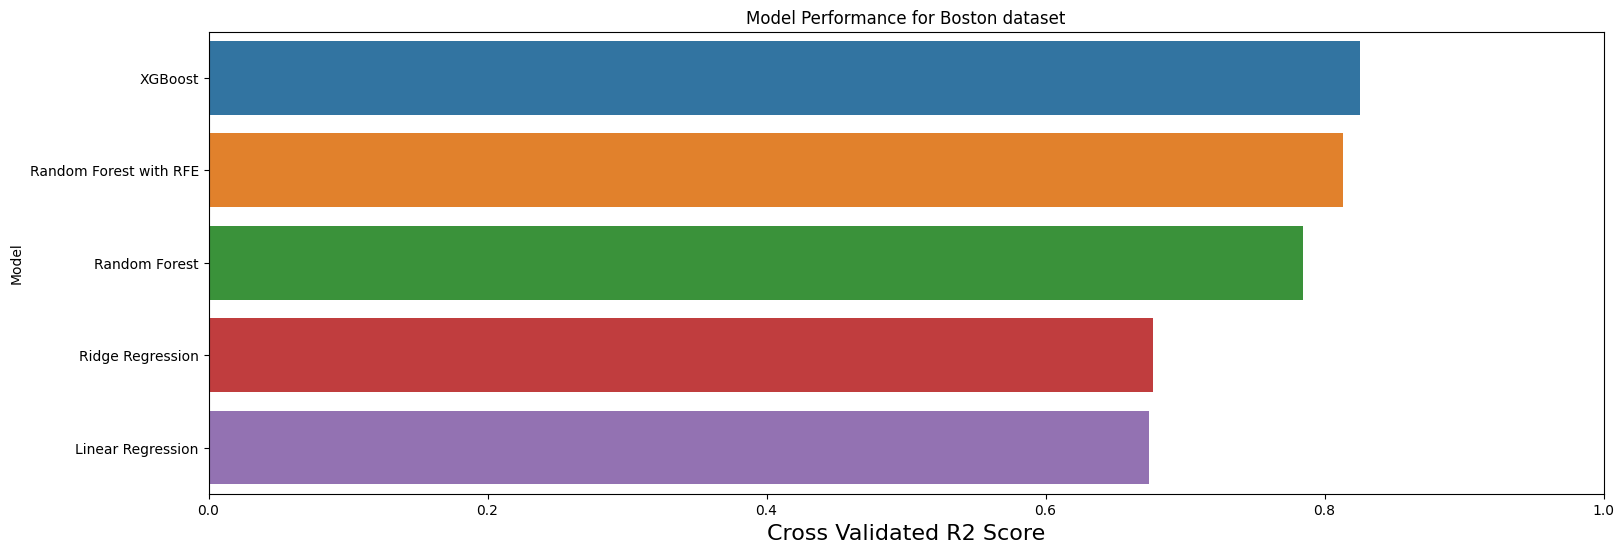

In [51]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions2.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions2, hue='Model', ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance for Boston dataset')
plt.show()

In [52]:
# HYPERPARAMETER TUNING USING GridSearchCV
# GridSearchCV is a tool from the Scikit-learn library used to find the best possible hyperparameters for your model. 
# Instead of you manually guessing and checking which settings work best, GridSearchCV automates the process by trying every possible combination from a list you provide. 

# EXAMPLE: Tuned Ridge Regression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features are those features created by raising existing features to an exponent. 
# For example, if a dataset had one input feature X, 
# then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

In [53]:
# Listing parameters
from sklearn.model_selection import GridSearchCV

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)


In [54]:
# Tuned Ridge Regression performance for Avocado dataset

# Fit and tune model
clf.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)



{'model__alpha': 1}


In [55]:
ndf = [Reg_Models_Evaluation_Metrics(clf,X_train,y_train,X_test,y_test,y_pred)]

clf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score.insert(0, 'Model', 'Tuned Ridge Regression')
clf_score

RMSE:  0.2111
R2:  0.7363
Adjusted R2:  17.352
Cross Validated R2:  0.7406


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.73626,17.351963,0.740637,0.211108


In [56]:
# Tuned Ridge Regression performance for Boston dataset

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]


ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train2, y_train2)

# Model making a prediction on test data
y_pred2 = ridge_pipe.predict(X_test2)

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)
# Fit and tune model
clf.fit(X_train2, y_train2)
# Model making a prediction on test data
y_pred2 = ridge_pipe.predict(X_test2)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)

ndf = [Reg_Models_Evaluation_Metrics(clf,X_train2,y_train2,X_test2,y_test2,y_pred2)]

clf_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score2.insert(0, 'Model', 'Tuned Ridge Regression')
clf_score2


{'model__alpha': 14}
RMSE:  4.3562
R2:  0.7395
Adjusted R2:  4.3888
Cross Validated R2:  0.7596


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.739471,4.388775,0.759581,4.356196


In [57]:
# Final performance comparison after hypertuning

# 1. Avocado data set
result = pd.concat([clf_score, predictions], ignore_index=True, sort=False)
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.736260,17.351963,0.740637,0.211108
1,XGBoost,0.790755,13.973262,0.911971,0.184827
2,Random Forest with RFE,0.798507,13.492638,0.888439,0.181371
3,Random Forest,0.788988,14.082770,0.876344,0.185606
4,Linear Regression,0.598793,25.874890,0.604282,0.255931
5,Ridge Regression,0.599068,25.857853,0.604120,0.255843


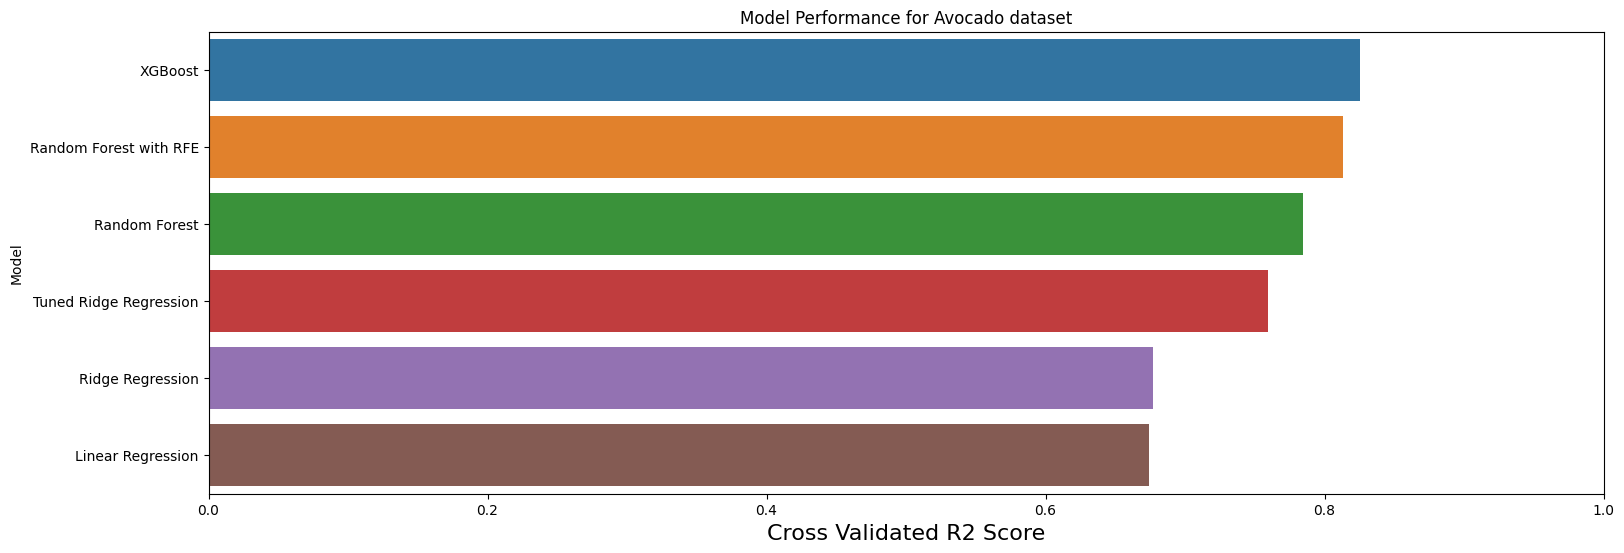

In [61]:
# NEW PLOT

f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', hue='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Avocado dataset')

plt.show()

In [59]:
# 2. Boston data set

result = pd.concat([clf_score2, predictions2], ignore_index=True, sort=False)
result


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.739471,4.388775,0.759581,4.356196
1,XGBoost,0.808228,3.494430,0.825649,3.595118
2,Random Forest with RFE,0.826365,3.258528,0.813027,3.420899
3,Random Forest,0.800977,3.588752,0.784399,3.662459
4,Ridge Regression,0.655600,5.479716,0.677292,4.817844
5,Linear Regression,0.654720,5.491162,0.673910,4.823995


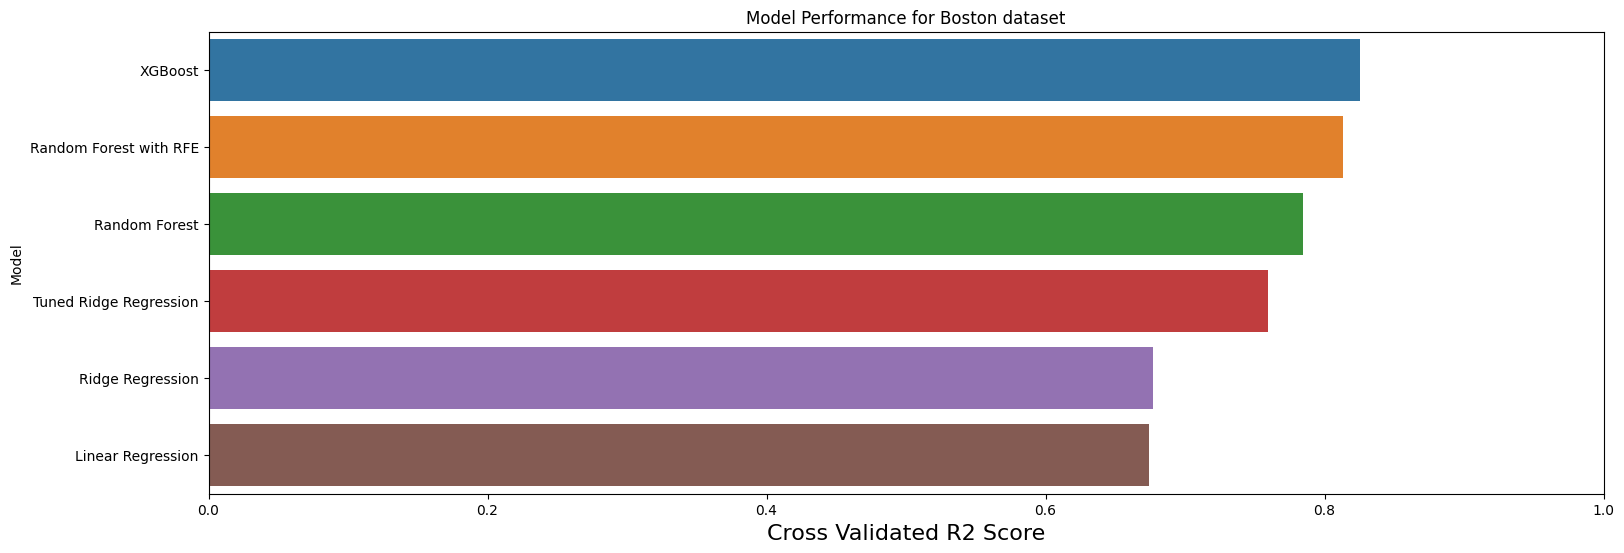

In [62]:
# NEW PLOT

f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', hue='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Boston dataset')

plt.show()